## Desafio Coder - Algoritmo ML
#### Alumno: Diego Venegas Gonzalez

In [1]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset - Precio de Viviendas
Este conjunto de datos contiene información sobre el precio de viviendas en Bulgaria (donde las casas están relativamente baratas) y diferentes variables que pueden influir en este precio, el objetivo es poder predecir el precio de las viviendas haciendo uso de un algoritmo de machine learning.

#### Descripción de las variables:
- CRIM: tasa de criminalidad per cápita por ciudad
- ZN: proporción de terreno residencial zonificado para lotes de más de 25,000 pies cuadrados
- INDUS: proporción de acres de negocios no minoristas por ciudad
- CHAS: variable ficticia de Charles River (= 1 si el lote limita con el río; 0 en caso contrario)
- NOX: concentración de óxidos de nitrógeno (partes por 10 millones)
- RM: número promedio de habitaciones por vivienda
- AGE: proporción de unidades ocupadas por el propietario construidas antes de 1940
- DIS: distancias ponderadas a cinco centros de empleo de Boston
- RAD: índice de accesibilidad a autopistas radiales
- TAX: tasa de impuestos a la propiedad de valor completo por cada $10,000
- PTRATIO: ratio alumno-profesor por ciudad
- B: 1000(Bk - 0.63)^2 donde Bk es la proporción de población negra por ciudad
- LSTAT: % de estatus inferior de la población
- MEDV: Valor mediano de las viviendas ocupadas por el propietario en miles de dólares

In [2]:
df = pd.read_csv("realstate.csv")

In [3]:
df.shape

(511, 14)

In [4]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 511 entries, 0 to 510
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     511 non-null    float64
 1   ZN       511 non-null    float64
 2   INDUS    511 non-null    float64
 3   CHAS     511 non-null    int64  
 4   NOX      511 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      511 non-null    float64
 7   DIS      511 non-null    float64
 8   RAD      511 non-null    int64  
 9   TAX      511 non-null    int64  
 10  PTRATIO  511 non-null    float64
 11  B        511 non-null    float64
 12  LSTAT    511 non-null    float64
 13  MEDV     511 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 56.0 KB


In [6]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,511.000000,511.000000,511.000000,511.000000,511.000000,506.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000,511.000000
mean,3.584139,11.252446,11.151096,0.068493,0.554757,6.287589,68.616243,3.783876,9.485323,407.440313,18.500000,356.600900,12.879550,22.682192
std,8.564433,23.234838,6.828175,0.252838,0.115310,0.703802,28.099130,2.098631,8.688469,167.903532,2.200348,90.882679,7.797416,9.484262
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082325,0.000000,5.190000,0.000000,0.449000,5.885500,45.050000,2.100350,4.000000,279.500000,17.400000,374.710000,7.065000,17.050000
50%,0.261690,0.000000,9.690000,0.000000,0.538000,6.209000,77.300000,3.152300,5.000000,330.000000,19.100000,391.340000,11.450000,21.200000
75%,3.621175,12.500000,18.100000,0.000000,0.624000,6.629750,94.050000,5.118000,24.000000,666.000000,20.200000,396.210000,17.105000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,23.000000,396.900000,76.000000,67.000000


## Análisis Exploratorio de Datos (EDA)

In [7]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         5
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [8]:
# Llenar los datos nulos con la media
media = df['RM'].mean()
df['RM'].fillna(media, inplace=True)

In [9]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

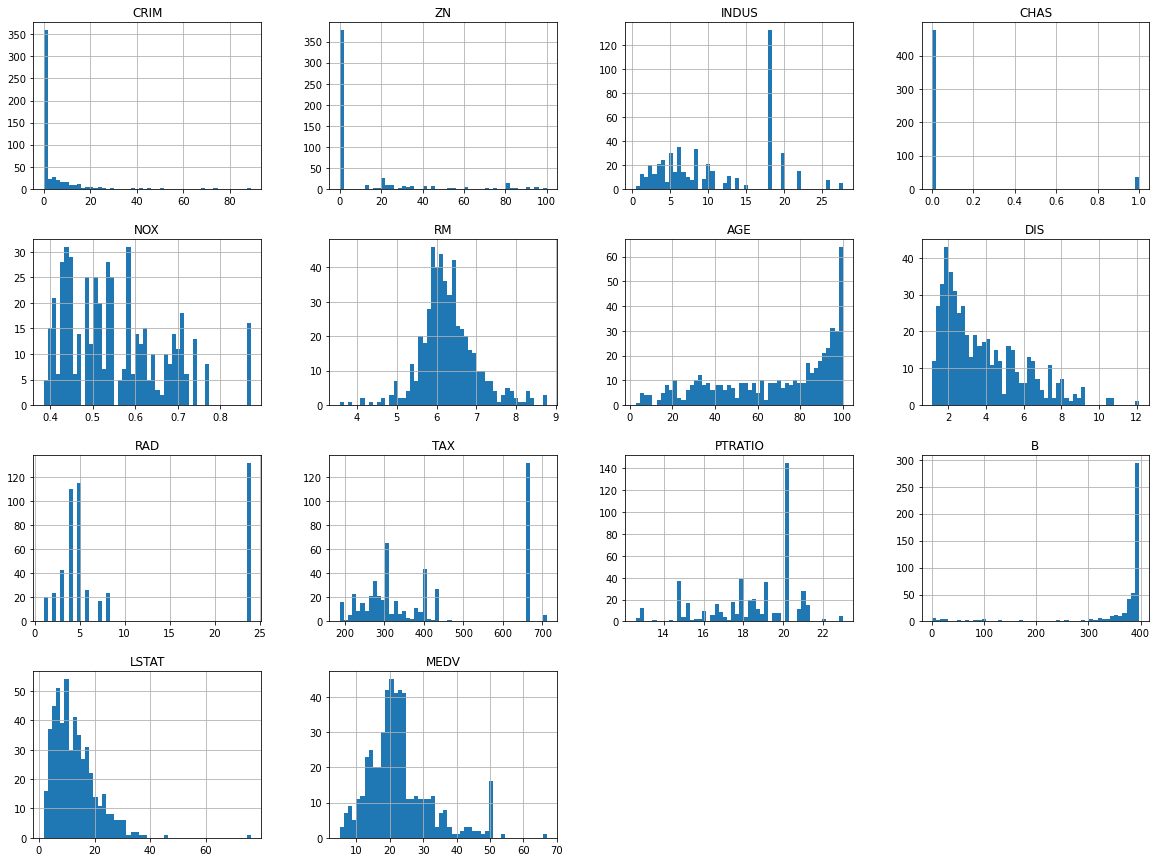

In [10]:
df.hist(bins=50,figsize=(20,15))
plt.show()

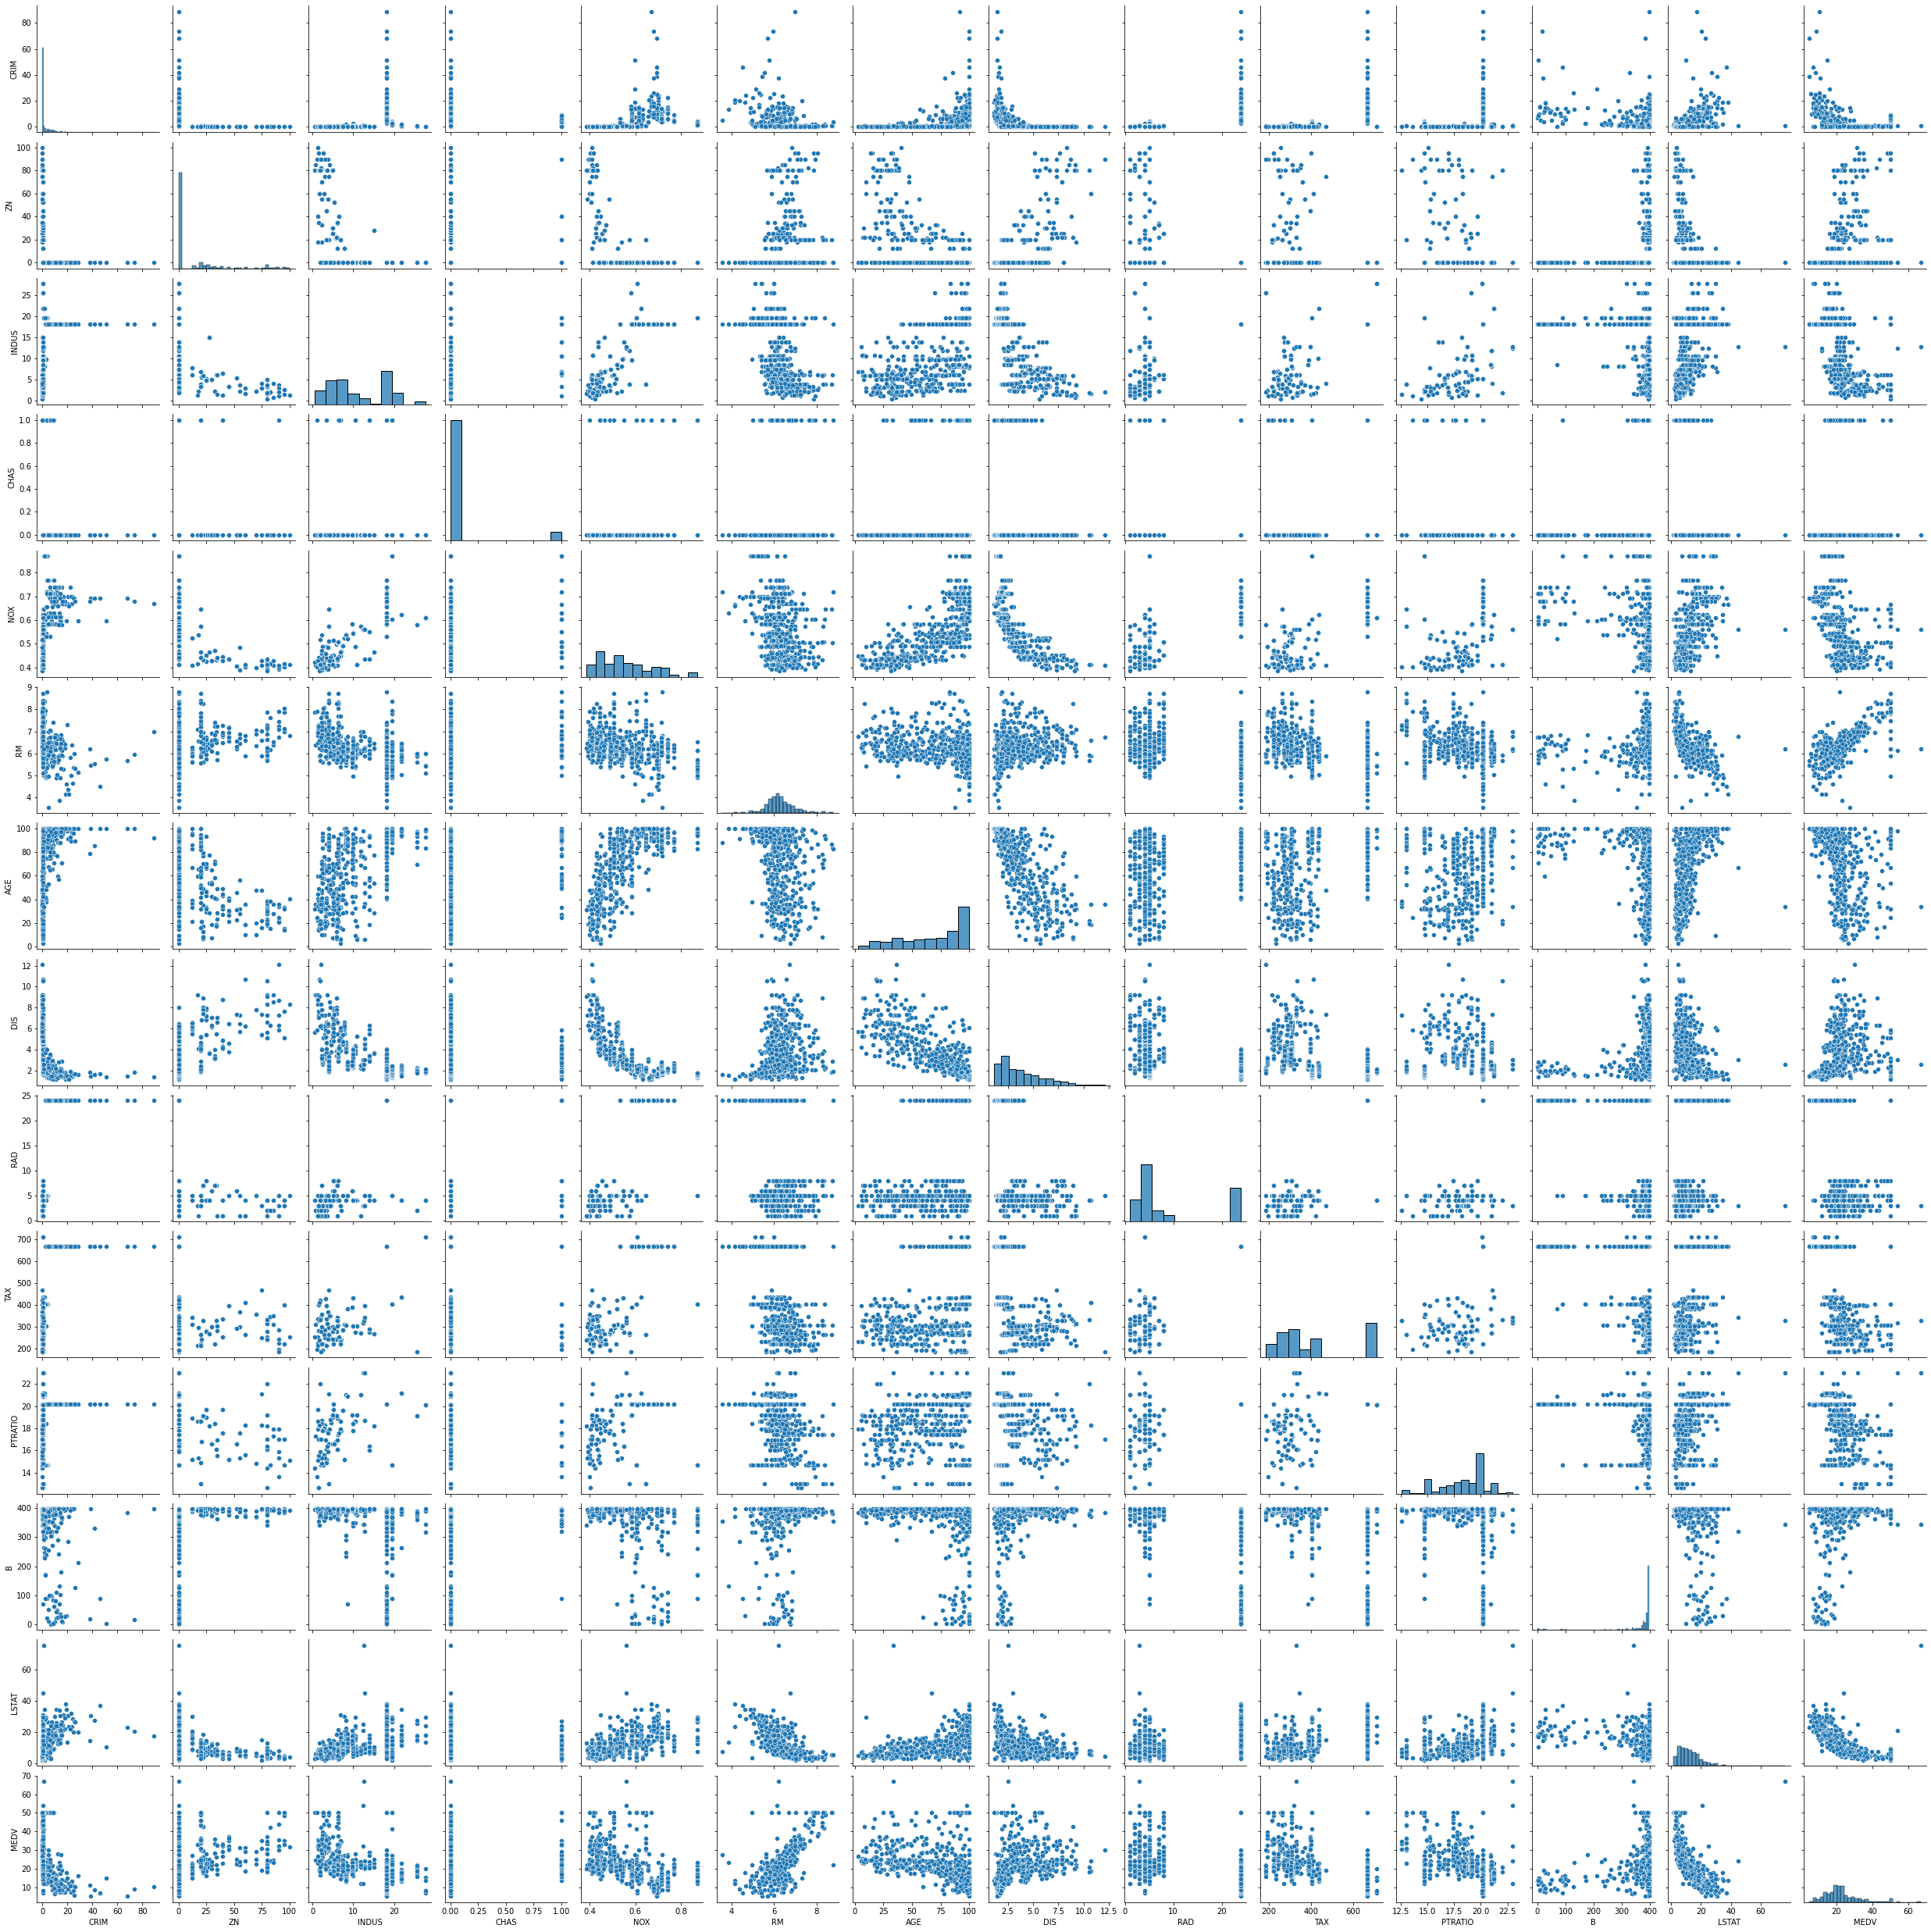

In [11]:
sns.pairplot(df)
plt.show()

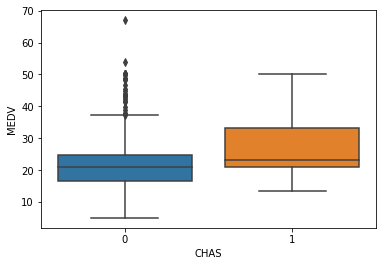

In [12]:
sns.boxplot(x='CHAS', y='MEDV', data = df)
plt.show()

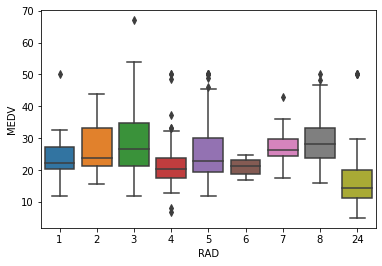

In [13]:
sns.boxplot(x='RAD', y='MEDV', data = df)
plt.show()

<AxesSubplot:>

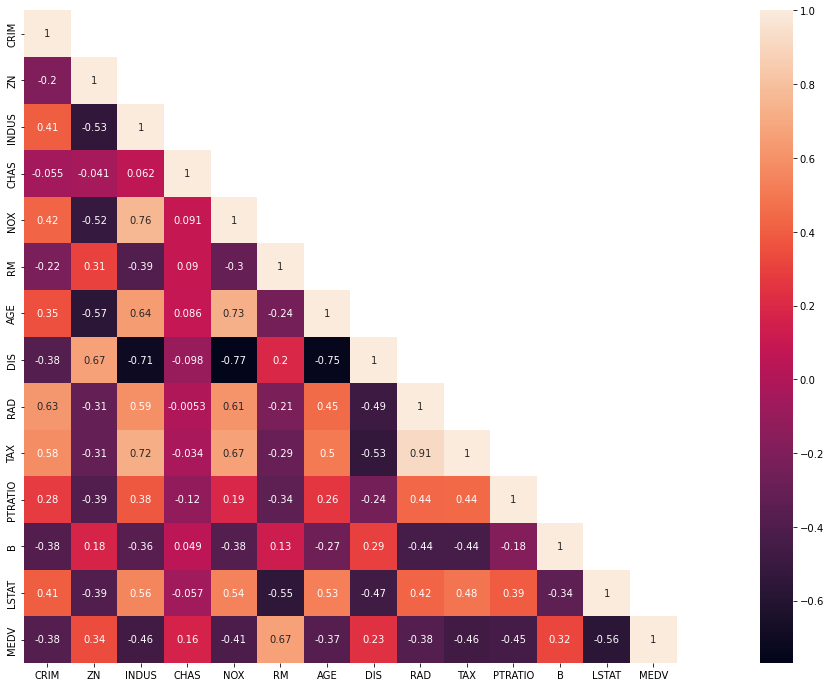

In [14]:
## Matriz de corelaciones
cor_mat = df.corr()
mask = np.array(cor_mat)
mask[np.tril_indices_from(mask)] = False
fig = plt.gcf()
fig.set_size_inches(30,12)
sns.heatmap(data=cor_mat,mask=mask,square=True,annot=True,cbar=True)

## Modelamiento

In [15]:
X = df.drop('MEDV', axis=1)
y = df['MEDV']

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [17]:
X_train.shape, y_train.shape

((357, 13), (357,))

In [18]:
X_test.shape, y_test.shape

((154, 13), (154,))

In [19]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
X_train_scaled.shape, y_train.shape

((357, 13), (357,))

In [21]:
scaler.mean_, scaler.var_

(array([3.43958141e+00, 1.07310924e+01, 1.12394398e+01, 7.56302521e-02,
        5.59374790e-01, 6.31831472e+00, 6.99739496e+01, 3.67484118e+00,
        9.57142857e+00, 4.08436975e+02, 1.83560224e+01, 3.58799972e+02,
        1.27612885e+01]),
 array([5.83009710e+01, 4.97793235e+02, 4.71294708e+01, 6.99103171e-02,
        1.35097700e-02, 5.35205613e-01, 7.66654139e+02, 4.07877161e+00,
        7.52925170e+01, 2.81020499e+04, 5.11025085e+00, 7.37707355e+03,
        5.72713317e+01]))

In [22]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train_scaled, y_train)

LinearRegression()

In [23]:
y_train_pred = lm.predict(X_train_scaled)
y_test_pred = lm.predict(X_test_scaled)

## Pruebas del Modelo

In [24]:
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)

print('RMSE (datos de train):', train_rmse)
print('RMSE (datos de test):', test_rmse)

RMSE (datos de train): 5.416601359508855
RMSE (datos de test): 7.232001820828984


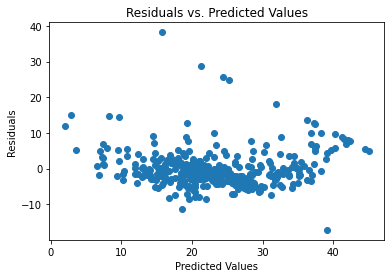

In [25]:
residuals = y_train - y_train_pred

# Revisar Homoscedasticidad
plt.scatter(y_train_pred, residuals)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Predicted Values')
plt.show()

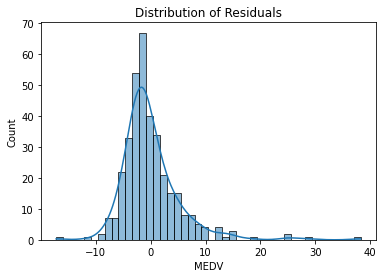

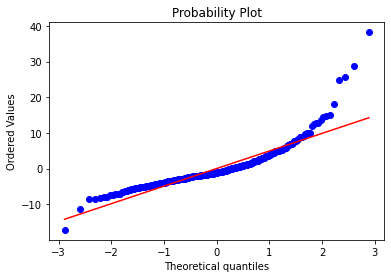

In [26]:
# Revisar Normalidad
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.show()

from scipy.stats import probplot

probplot(residuals, plot=plt)
plt.show()


In [27]:
import statsmodels.api as sm
from statsmodels.stats.diagnostic import linear_rainbow, het_breuschpagan
from statsmodels.stats.stattools import durbin_watson
from scipy.stats import shapiro

# Fit the model using statsmodels
X_train_scaled_sm = sm.add_constant(X_train_scaled)
model_sm = sm.OLS(y_train, X_train_scaled_sm)
results = model_sm.fit()

# Predicted values
y_train_pred_sm = results.predict(X_train_scaled_sm)

# Residuals
residuals_sm = y_train - y_train_pred_sm

# Rainbow test for linearity
stat, p = linear_rainbow(results)
print(f'Rainbow test p-value: {p}')

# Durbin-Watson test for independence
dw = durbin_watson(residuals_sm)
print(f'Durbin-Watson test statistic: {dw}')

# Breusch-Pagan test for homoscedasticity
_, p, _, _ = het_breuschpagan(residuals_sm, X_train_scaled_sm)
print(f'Breusch-Pagan test p-value: {p}')

# Shapiro-Wilk test for normality
_, p = shapiro(residuals_sm)
print(f'Shapiro-Wilk test p-value: {p}')


Rainbow test p-value: 0.12486502609308286
Durbin-Watson test statistic: 2.0457546925376673
Breusch-Pagan test p-value: 0.03720136235853958
Shapiro-Wilk test p-value: 2.0483004342146942e-19


In [28]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.676
Method:                 Least Squares   F-statistic:                     58.09
Date:                Wed, 24 May 2023   Prob (F-statistic):           2.08e-78
Time:                        09:55:59   Log-Likelihood:                -1109.7
No. Observations:                 357   AIC:                             2247.
Df Residuals:                     343   BIC:                             2302.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.2770      0.292     79.588      0.0

In [29]:
# R-squared
r_squared = results.rsquared
print(f'R-squared: {r_squared}')

# Adjusted R-squared
adjusted_r_squared = results.rsquared_adj
print(f'Adjusted R-squared: {adjusted_r_squared}')

R-squared: 0.6876476752398009
Adjusted R-squared: 0.6758092489369362


## Conclusiones

Dado los valores obtenidos en las pruebas se concluye que este modelo de regresión no cumple con 2 de los 4 supuestos:
- Linealidad: Sí lo cumple porque la correlación es significativamente alta
- Independencia de observaciones: Sí lo cumple porque las variables no son dependientes entre sí
- Homocedasticidad: NO lo cumple porque la gráfica muestra que la varianza de los errores no es constante y además la prueba de Breusch-Pagan es menor que 0.05
- Normalidad: NO lo cumple porque la gráfica del Q-Q plot muestra que no se alinean los valores con la linea roja y además la prueba de Shapiro-Wilk nos indica que el valor es menor a 0.05